
**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.
**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.
**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [4]:
train_df=pd.read_csv('/content/train_1.csv')
test_df=pd.read_csv('/content/test1_.csv')

In [5]:
# checkimg the shape of the training dataset
train_df.shape

(8693, 14)

In [6]:

# checkimg the shape of the testing dataset
test_df.shape

(4277, 13)

In [7]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [8]:
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [9]:
# cheking the duplicates in the training dataset
train_df.duplicated().sum()

0

In [10]:
# cheking the percentage of duplicates in the training dataset
100*train_df.duplicated().sum()/train_df.shape[0]

0.0

In [11]:
# cheking the duplicates in the testinf dataset
test_df.duplicated().sum()

0

In [12]:
# cheking the percentage of duplicates in the testing dataset
test_df.duplicated().sum()/train_df.shape[0]

0.0

In [13]:
# Checking the datatypes of of training and testing data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [15]:
# checking missing values in training dataset
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [16]:
# only those rows who have missing values in training dataset
train_df.isnull().sum()[train_df.isnull().sum()>0]

,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183


In [17]:
df1 = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:'No of missing values'})
df1['% of missing values ']=df1['No of missing values']/train_df.shape[0]*100

In [18]:
df1

,No of missing values,% of missing values
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730
Spa,183,2.105142


In [19]:
# checking missing values in testing dataset
test_df.isnull().sum()

,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [20]:
# only those rows who have missing values in testing dataset
test_df.isnull().sum()[test_df.isnull().sum()>0]

,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98
Spa,101


In [21]:
df2=test_df.isnull().sum()[test_df.isnull().sum()>0].to_frame().rename(columns={0:'No of missing values'})
df2['% of missing values ']=df2['No of missing values']/test_df.shape[0]*100
df2

,No of missing values,% of missing values
HomePlanet,87,2.034136
CryoSleep,93,2.174421
Cabin,100,2.338087
Destination,92,2.151040
Age,91,2.127660
VIP,93,2.174421
RoomService,82,1.917232
FoodCourt,106,2.478373
ShoppingMall,98,2.291326
Spa,101,2.361468


In [22]:
# Categorical values of training dataset
train_df.select_dtypes(include='object').nunique()

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
VIP,2
Name,8473


In [23]:
print('Training data ')

c=train_df.select_dtypes(include='object')
for i in c:
  print(i,'.......',train_df[i].unique())



Training data 
PassengerId ....... ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet ....... ['Europa' 'Earth' 'Mars' nan]
CryoSleep ....... [False True nan]
Cabin ....... ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination ....... ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP ....... [False True nan]
Name ....... ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [24]:
# Categorical values of training dataset
test_df.select_dtypes(include='object').nunique()

,0
PassengerId,4277
HomePlanet,3
CryoSleep,2
Cabin,3265
Destination,3
VIP,2
Name,4176


In [25]:

print('testing data ' )


b=test_df.select_dtypes(include='object')
for i in b:
  print(i,'.......',test_df[i].unique())

testing data 
PassengerId ....... ['0013_01' '0018_01' '0019_01' ... '9271_01' '9273_01' '9277_01']
HomePlanet ....... ['Earth' 'Europa' 'Mars' nan]
CryoSleep ....... [True False nan]
Cabin ....... ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
Destination ....... ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
VIP ....... [False nan True]
Name ....... ['Nelly Carsoning' 'Lerome Peckers' 'Sabih Unhearfus' ... 'Jayrin Pore'
 'Kitakan Conale' 'Lilace Leonzaley']


EDA

In [26]:
train_df['Transported'].value_counts()


,count
Transported,
True,4378
False,4315


In [27]:
v=train_df['Transported'].value_counts().values
v

array([4378, 4315])

([<matplotlib.patches.Wedge at 0x7a1ddaf7fb20>,
 [Text(-0.012522008688130765, 1.0999287246446539, ''),
  Text(0.01252200868813063, -1.0999287246446539, '')])

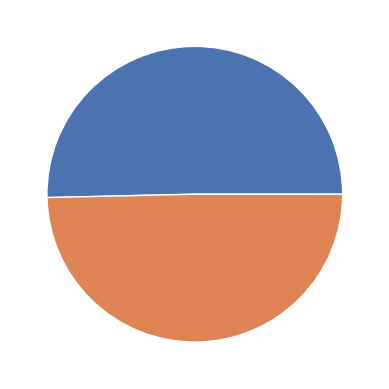

In [28]:
plt.pie(v)

In [29]:
i=train_df['Transported'].value_counts().index
i

Index([True, False], dtype='bool', name='Transported')

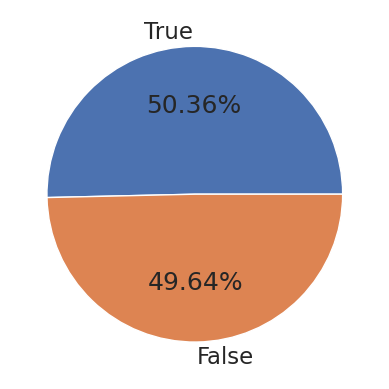

In [30]:
#plt.pie(v,labels=train_df['Transported'].unique(),autopct='%0.2f%%')
#plt.show()

plt.pie(v,labels=i,autopct='%0.2f%%')
plt.show()

# **Observation** : Through this pie chart we came to know that it is not a inbalance data

<Axes: xlabel='Age', ylabel='Count'>

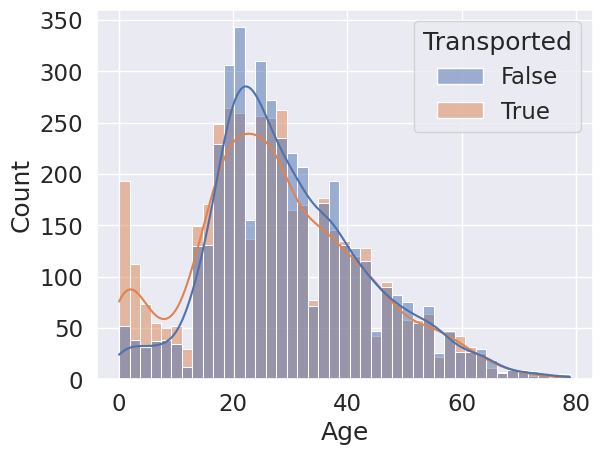

In [31]:
sns.histplot(x=train_df['Age'],hue='Transported',data=train_df,kde=True)
# sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2")

**Observation**: Mostly the age of people who were travelling is between 18-42.

Mostly people survived is between 0-10

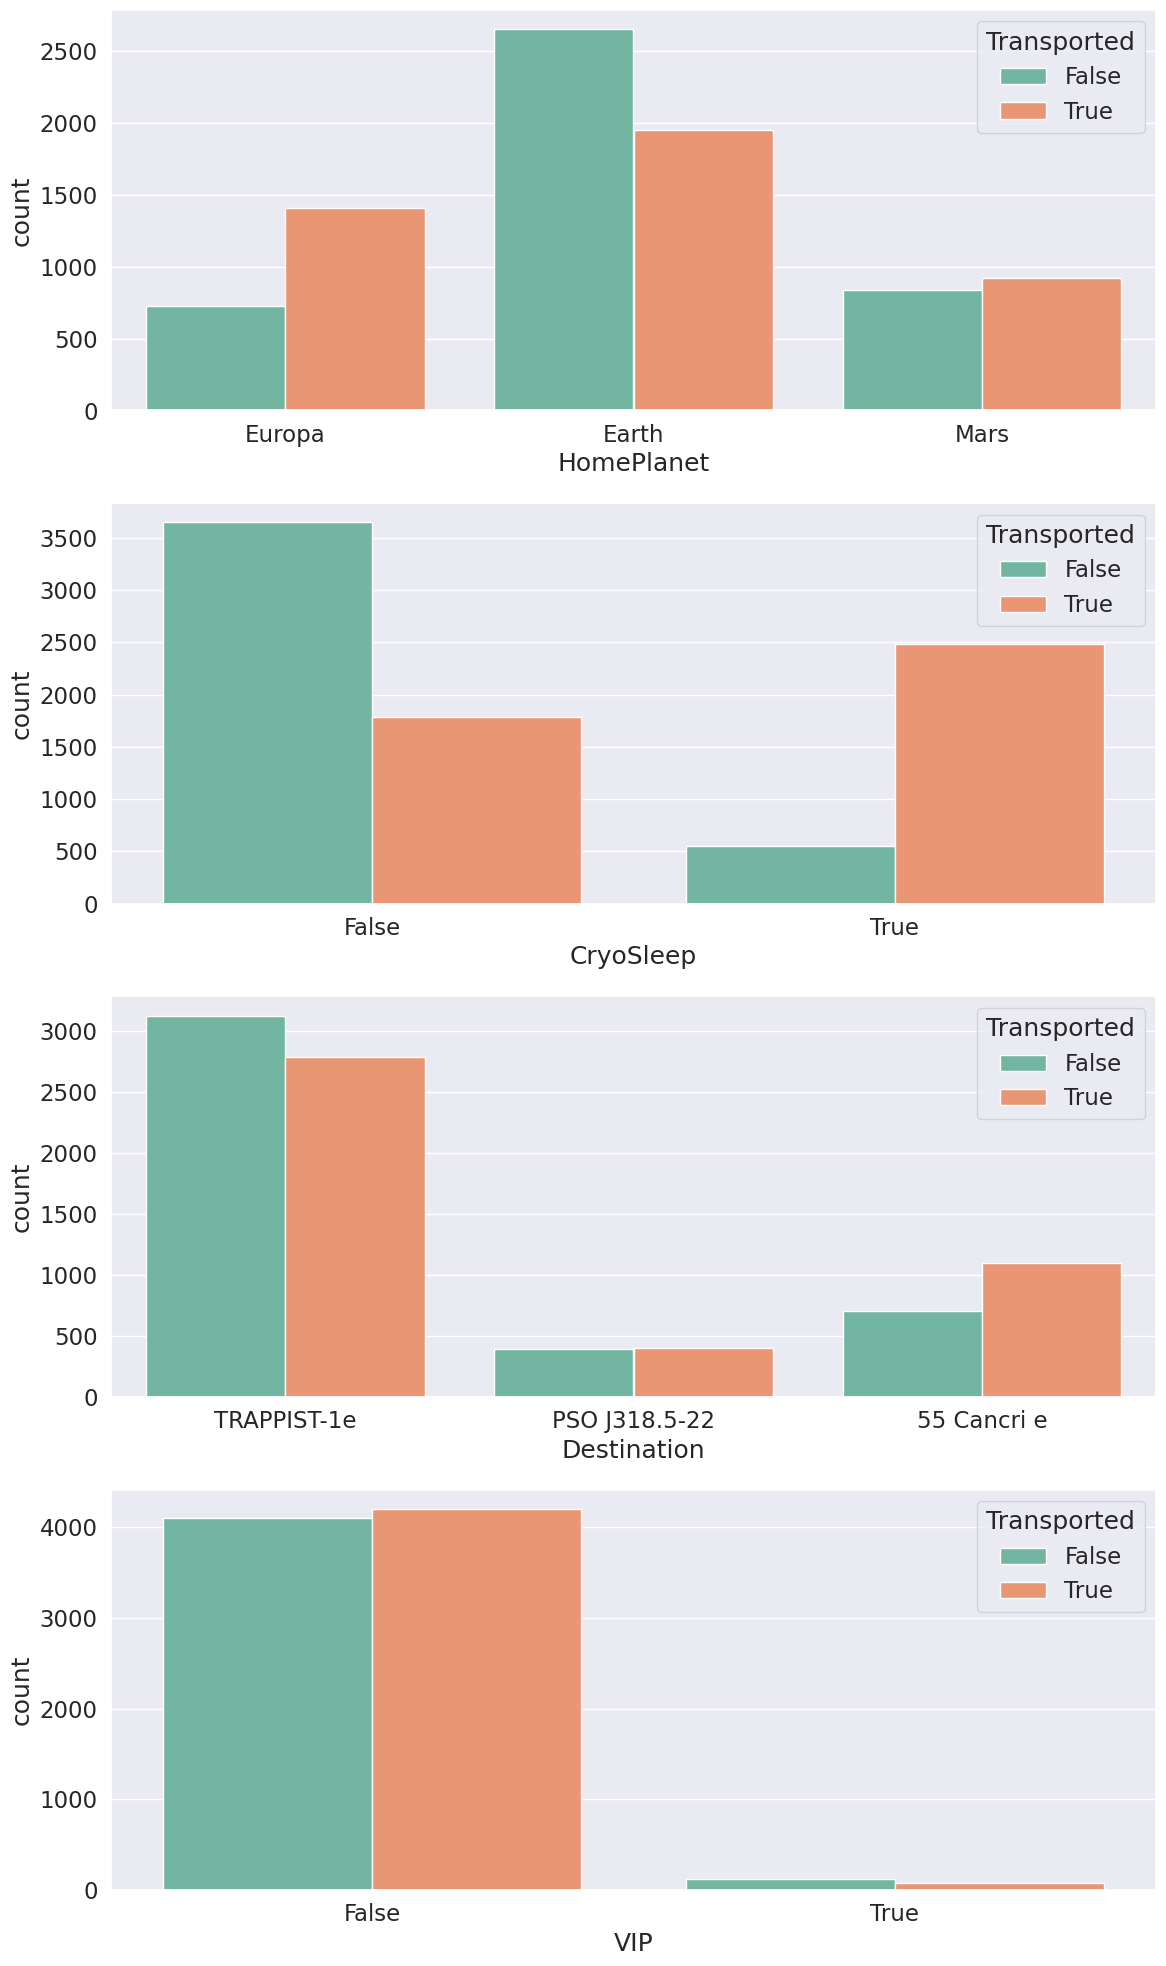

In [32]:
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    #plt.title(column,'Distribution')
    #plt.title(f"{column} Distribution")
    plt.tight_layout()

**Feature Engineering**


## **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where **gggg indicates a group the passenger is travelling with and pp is their number within the group**. People in a group are often family members

In [33]:
def passengerid_new_features(df):

    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])

    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()

    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)

    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)

    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [34]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

In [35]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2


In [36]:
train_df.drop(columns=['Group','Member'],inplace=True)
test_df.drop(columns=['Group','Member'],inplace=True)

In [37]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2


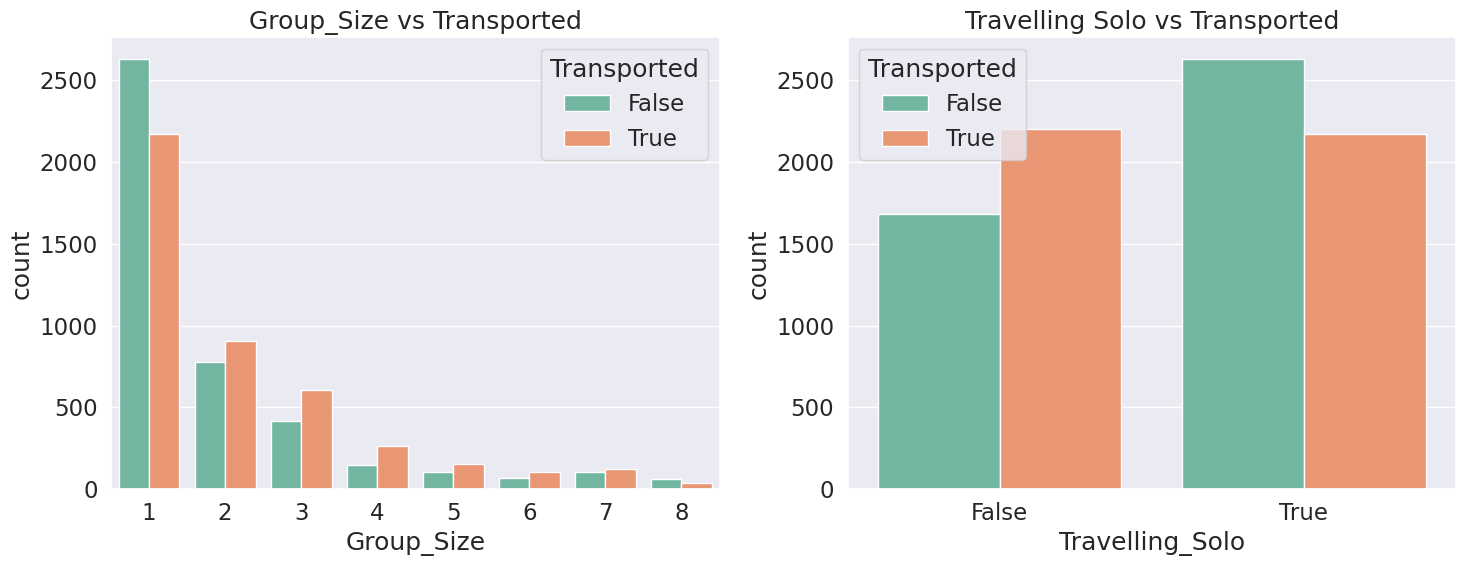

In [38]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

In [39]:
train_df['Cabin'].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [40]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories

    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])

    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    for i in cols:
      df[i]=df[i].replace("np.nan",np.nan)

    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].mode()[0],inplace=True)

In [41]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

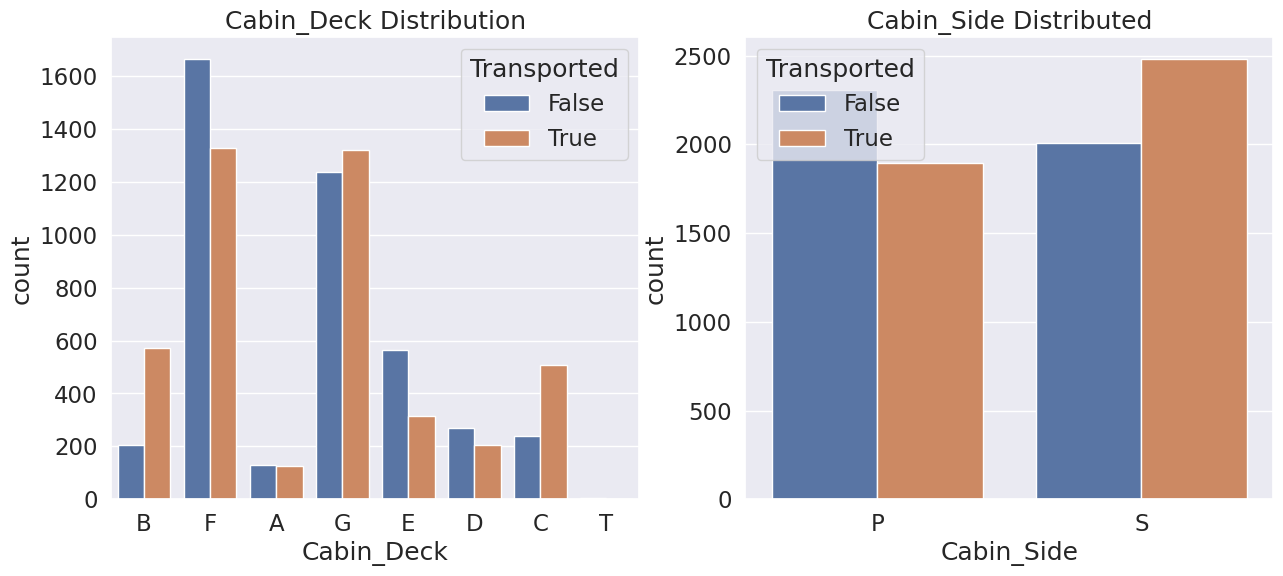

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='Cabin_Deck', hue='Transported', data=train_df)
plt.title('Cabin_Deck Distribution')

plt.subplot(1,2,2)
sns.countplot(x='Cabin_Side', hue='Transported', data=train_df)
plt.title('Cabin_Side Distributed')
plt.show()

In [43]:
train_df['Cabin_Number']=train_df['Cabin_Number'].astype(int)
test_df['Cabin_Number']=train_df['Cabin_Number'].astype(int)

In [44]:
print('Total unique values present in Cabin Number : ',train_df['Cabin_Number'].nunique())
print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_df["Cabin_Number"].max())

Total unique values present in Cabin Number :  1817
The Mean of Cabin_Number Feature is:  588.5012078683999
The Median of Cabin_Number Feature is: 407.0
The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


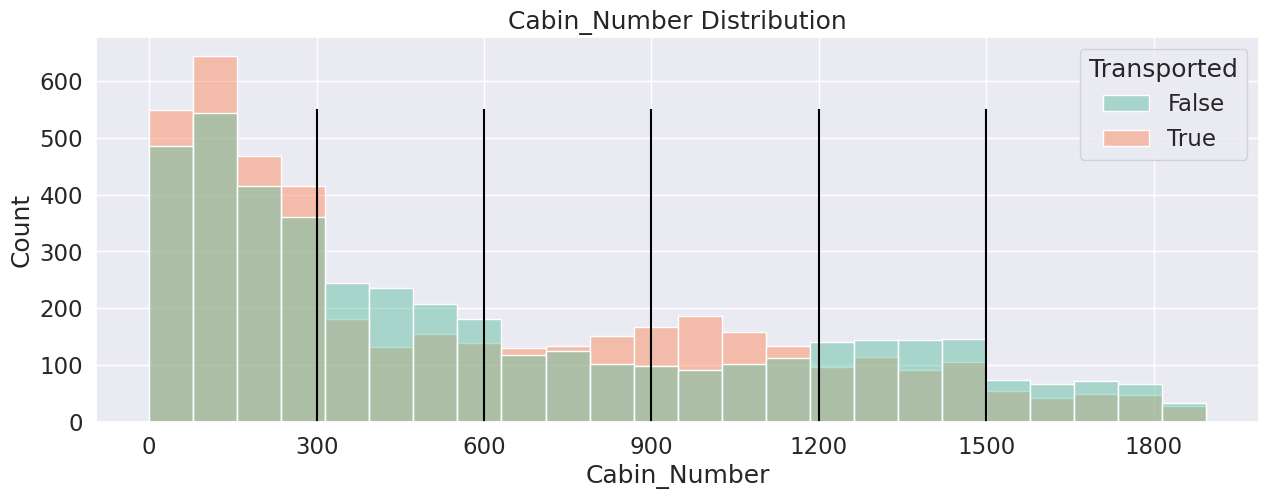

In [45]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

We can create a new feature Cabin_region which indicates passenger cabin number region

In [46]:
# creationg new feature 'Cabin_Region' From "Cabin_Number"
def cabin_region(df):
  df['Cabin_region1'] = (df['Cabin_Number']<300)
  df['Cabin_region2'] = (df['Cabin_Number']>=300) & (df['Cabin_Number']<600)
  df['Cabin_region3'] = (df['Cabin_Number']>=600) & (df['Cabin_Number']<1200)
  df['Cabin_region4'] = (df['Cabin_Number']>=1200) & (df['Cabin_Number']<1500)
  df['Cabin_region5'] = (df['Cabin_Number']>=1500) & (df['Cabin_Number']<1800)
  df['Cabin_region6'] = (df['Cabin_Number']>=1800)

In [47]:
cabin_region(train_df)
cabin_region(test_df)

In [48]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Number,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,True,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,True,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S,True,False,False,False,False,False


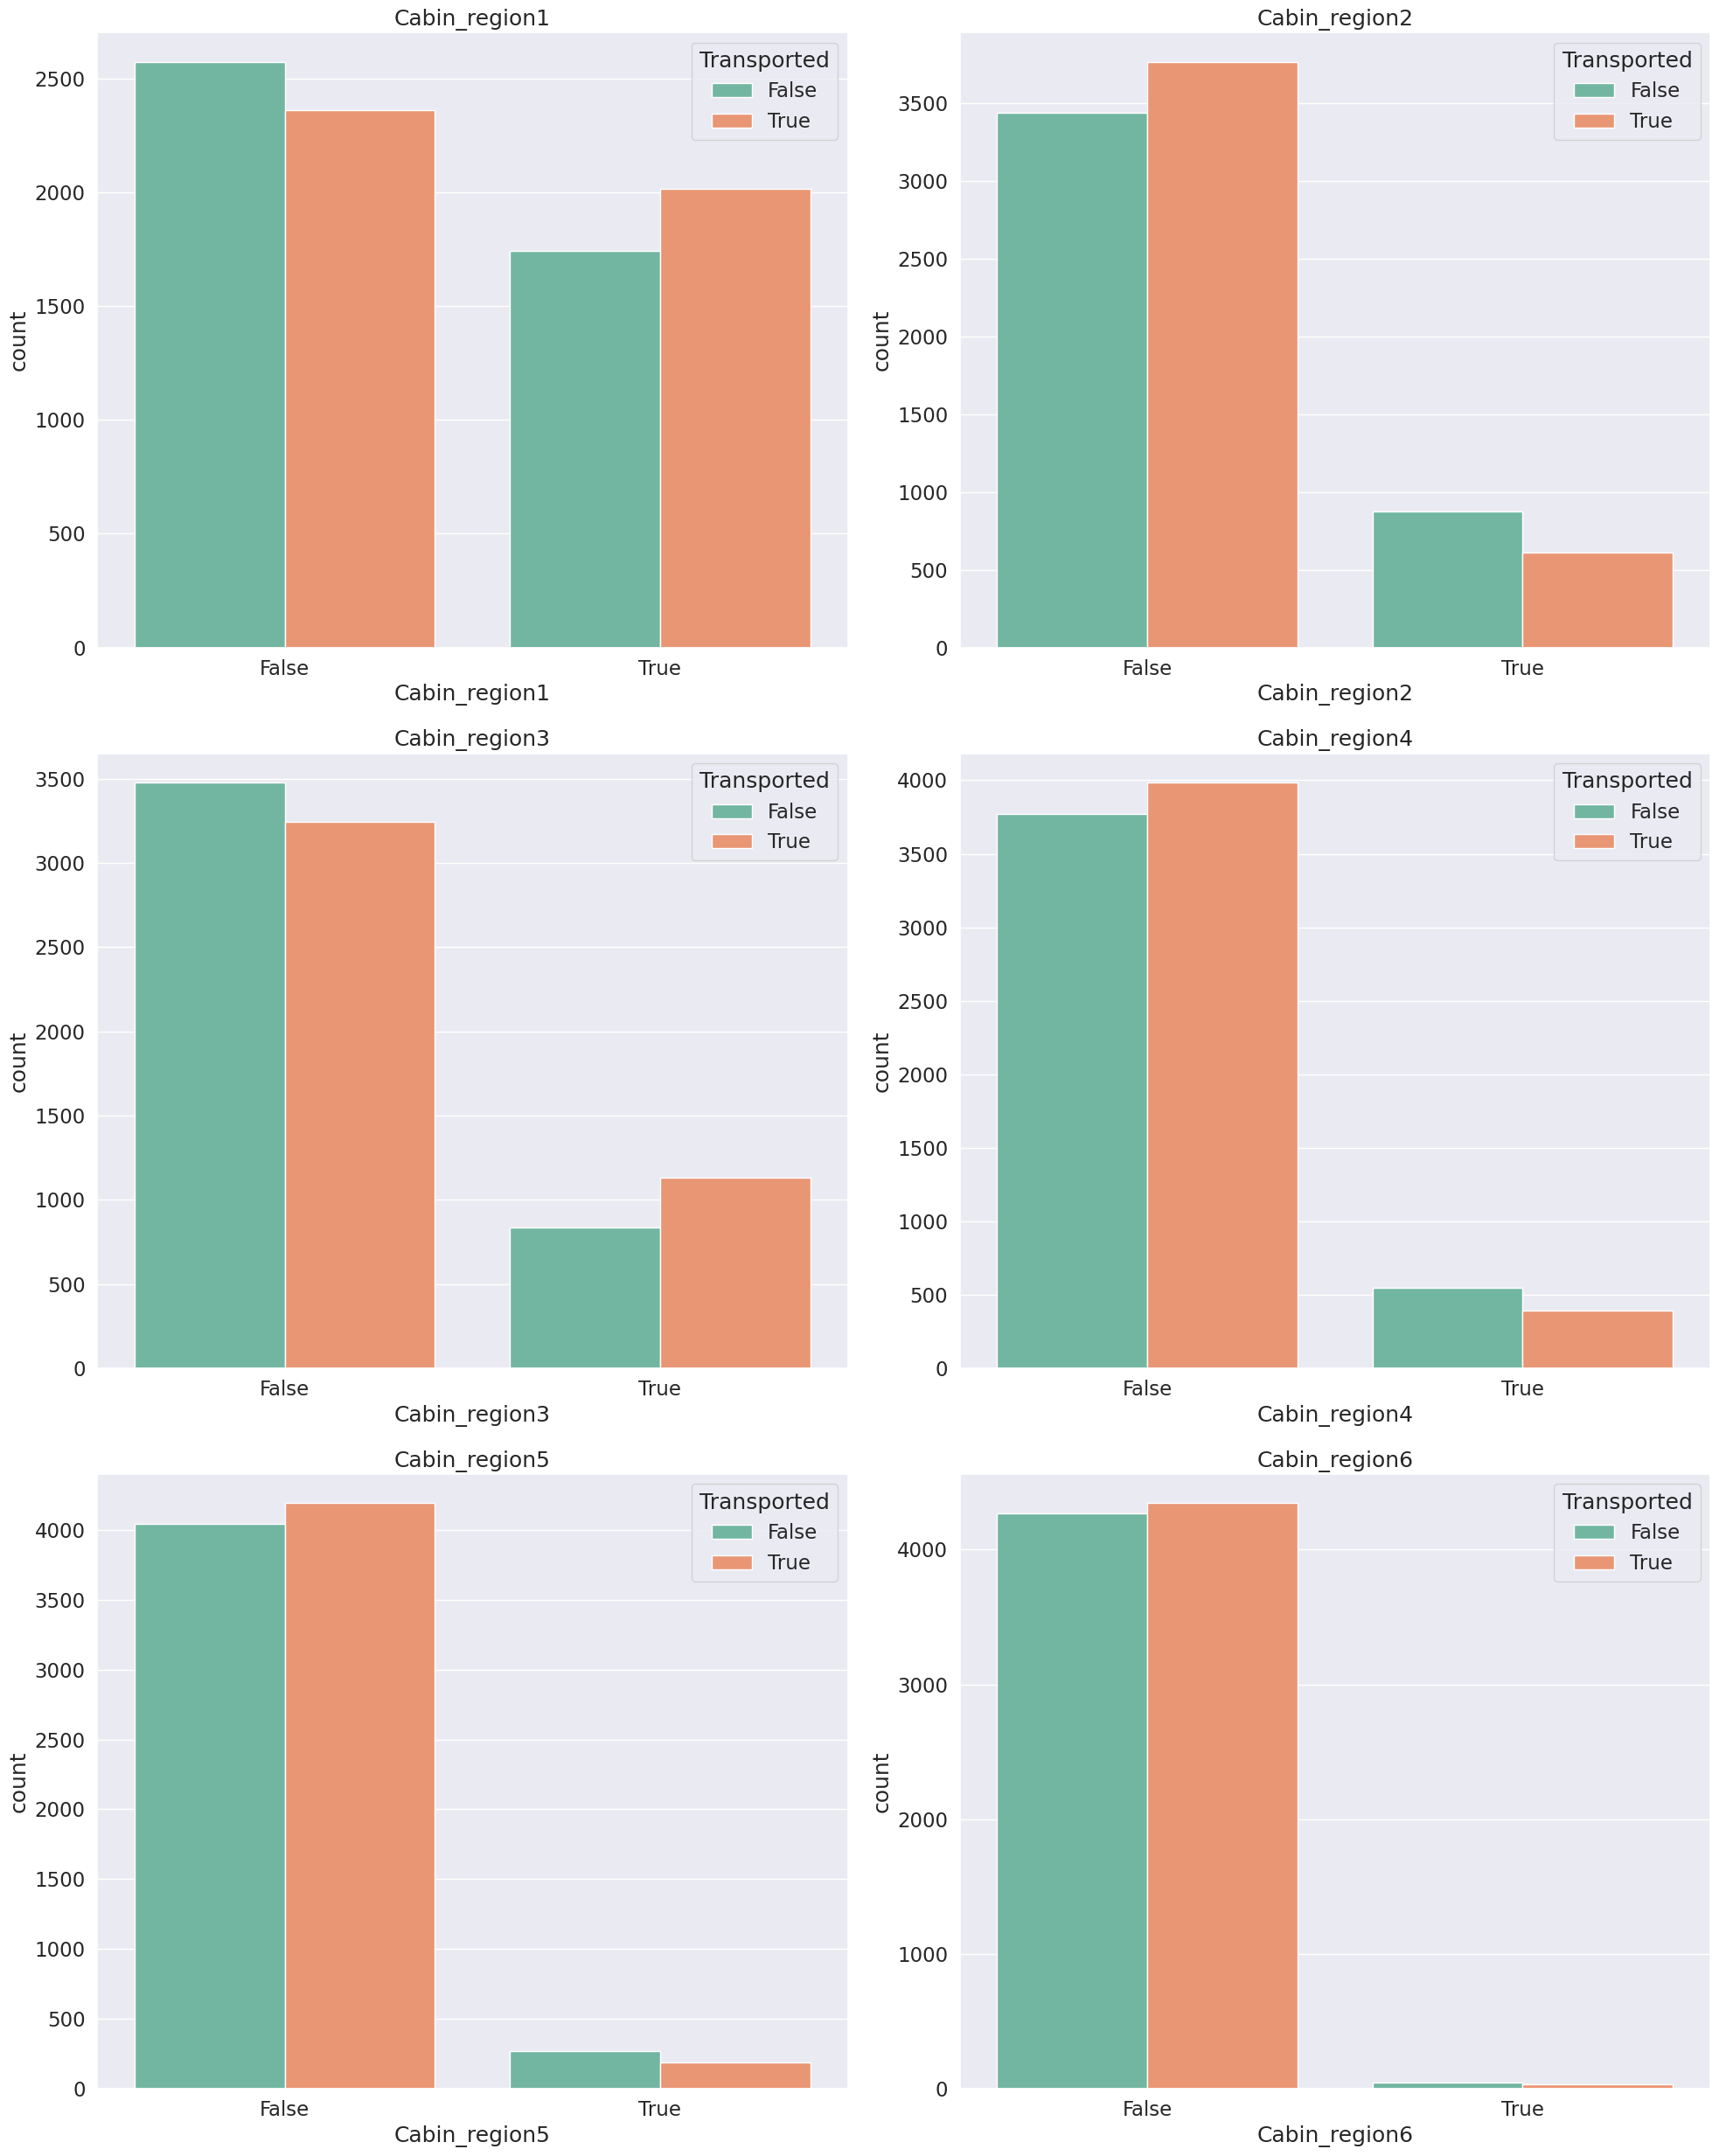

In [49]:
cols=['Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6']
plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
  plt.subplot(3,2,idx+1)
  sns.countplot(x=value,hue='Transported',data=train_df,palette="Set2")
  plt.title(value)
  plt.tight_layout()

In [50]:
train_df.drop(columns=["Cabin_Number"],inplace=True)
test_df.drop(columns=["Cabin_Number"],inplace=True)

In [51]:
# Creating new feature from age
train_df['Age'].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [52]:
print("The Minimum value of Age feature is:",train_df["Age"].min())
print("The Maximum value of Age Feature is:",train_df["Age"].max())

The Minimum value of Age feature is: 0.0
The Maximum value of Age Feature is: 79.0


In [53]:
def age_group(df):
  age_group = []
  for i in df['Age']:
    if i<=12:
      age_group.append('Age_0-12')

    elif i>12 and i<=18:
      age_group.append('Age_13-18')

    elif i>18 and i<=25:
      age_group.append('Age_19-25')

    elif i>25 and i<=32:
      age_group.append('Age_26-32')

    elif i>32 and i<=50:
      age_group.append('Age_33-50')

    elif i>50:
      age_group.append('Age_50+')

    else:
      age_group.append(np.nan)

  df['Age_Group']=age_group

In [54]:
age_group(train_df)
age_group(test_df)

In [55]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Age_Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33-50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_50+


In [56]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Age_Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33-50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_50+


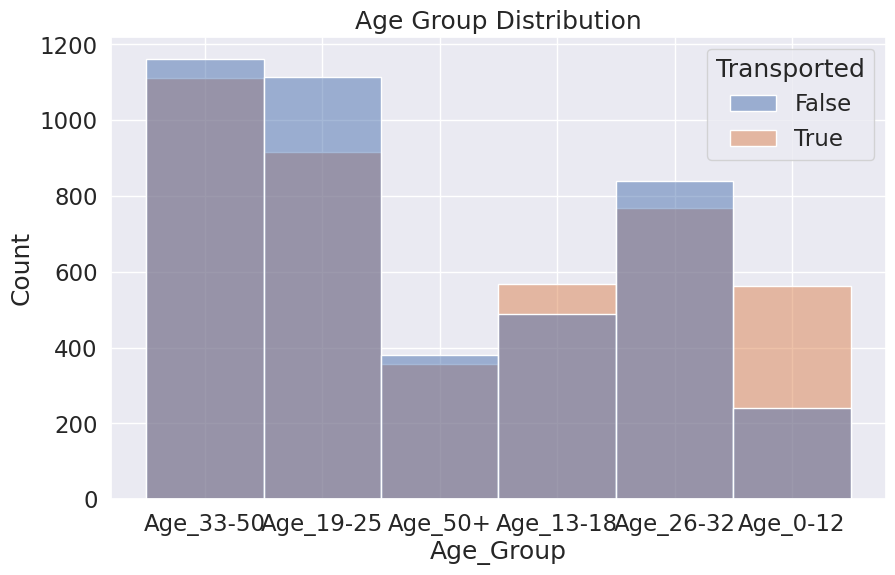

In [57]:
# order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(10,6))
sns.histplot(x=train_df['Age_Group'],hue="Transported", data=train_df)
plt.title("Age Group Distribution");

In [58]:
# Creating a new feature Using All Expenditure .
train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [59]:
exp_col=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

def new_exp_feature(df):
  df['Total Expenditure']=df[exp_col].sum(axis=1)
  df['No Spending']=(df['Total Expenditure']==0)

In [60]:
new_exp_feature(train_df)
new_exp_feature(test_df)

In [61]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Age_Group,Total Expenditure,No Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33-50,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_50+,10383.0,False


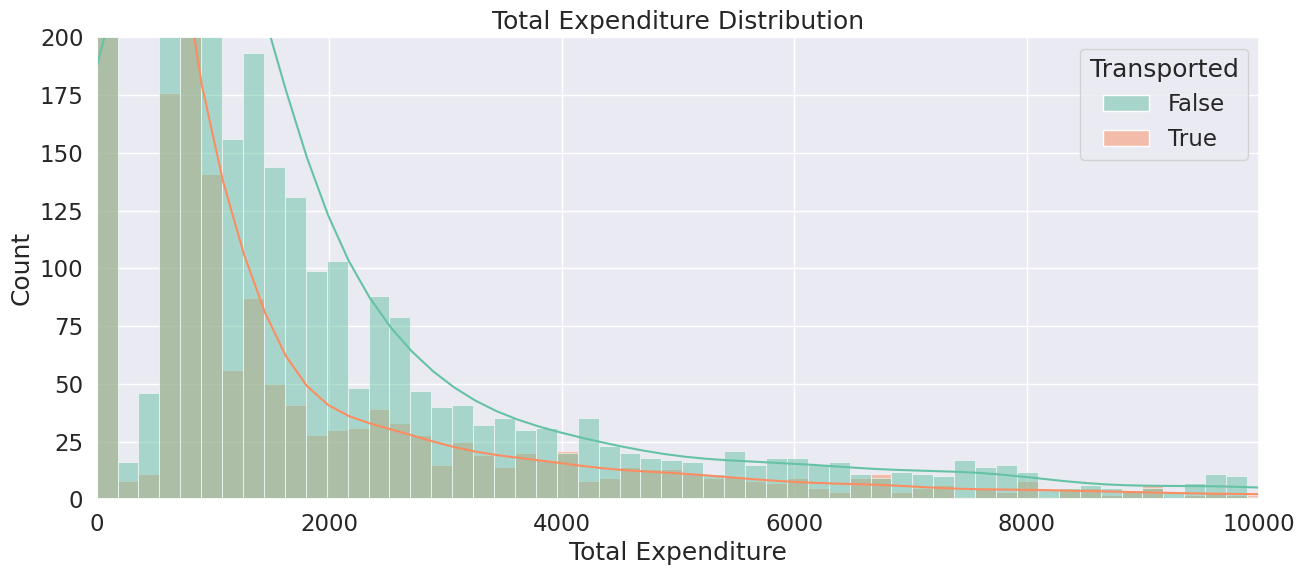

In [62]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=train_df, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution");

In [63]:
print("The Mean value of Total Expenditure feature is:",train_df["Total Expenditure"].mean())
print("The Median value of Total Expenditure Feature is:",train_df["Total Expenditure"].median())

print("The Maximun value of Total Expenditure Feature is:",train_df["Total Expenditure"].max())

The Mean value of Total Expenditure feature is: 1440.8663292304152
The Median value of Total Expenditure Feature is: 716.0
The Maximun value of Total Expenditure Feature is: 35987.0


In [64]:
def expenditure_category(df):
    expense_category = []

    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")

    df["Expenditure Category"] = expense_category

In [65]:
expenditure_category(train_df)
expenditure_category(test_df)

In [66]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Age_Group,Total Expenditure,No Spending,Expenditure Category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,P,True,False,False,False,False,False,Age_33-50,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,S,True,False,False,False,False,False,Age_19-25,736.0,False,Medium Expense
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,S,True,False,False,False,False,False,Age_50+,10383.0,False,High Expense


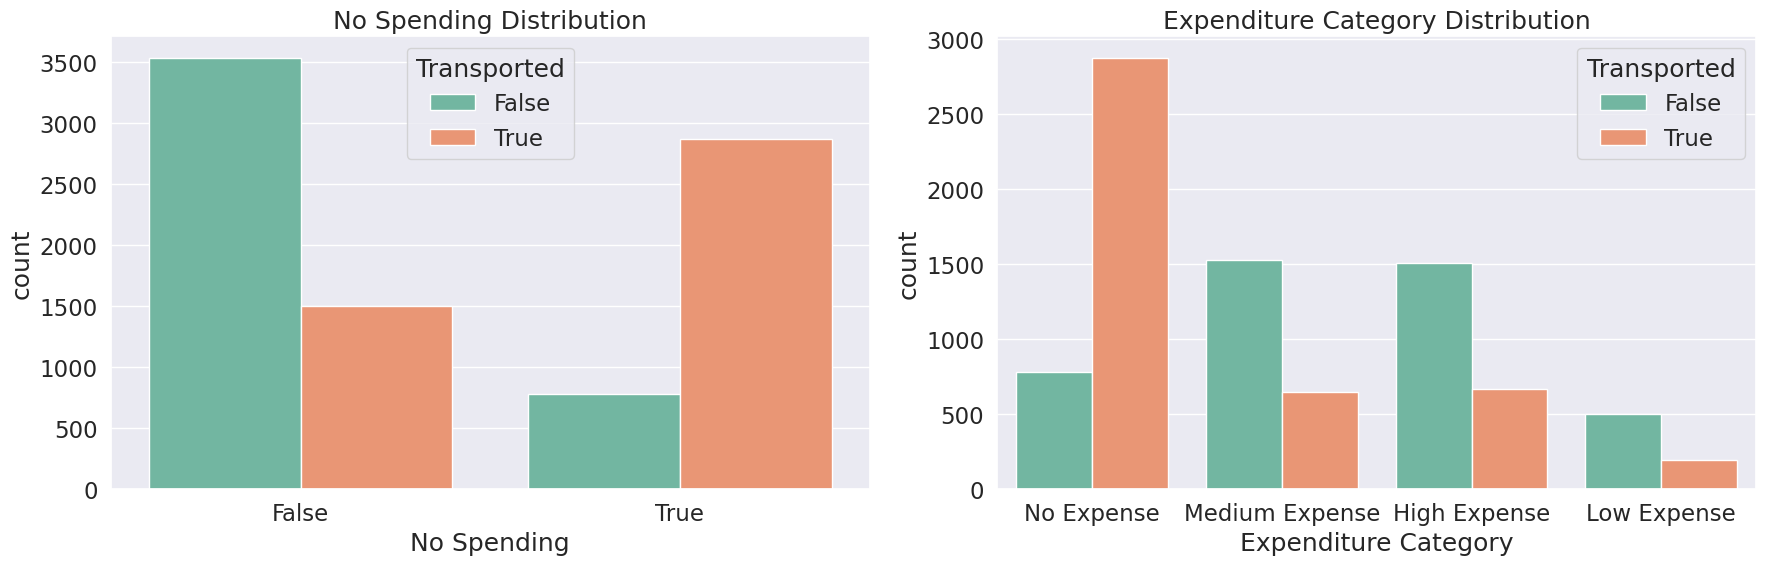

In [67]:
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

Data Preprossing

In [68]:
# Handling Missing values
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:'No of missing values'})
z['% of missing values ']=z['No of missing values']/train_df.shape[0]*100
z

,No of missing values,% of missing values
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730
Spa,183,2.105142
VRDeck,188,2.162660


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           8693 non-null   object 
 1   HomePlanet            8492 non-null   object 
 2   CryoSleep             8476 non-null   object 
 3   Cabin                 8693 non-null   object 
 4   Destination           8511 non-null   object 
 5   Age                   8514 non-null   float64
 6   VIP                   8490 non-null   object 
 7   RoomService           8512 non-null   float64
 8   FoodCourt             8510 non-null   float64
 9   ShoppingMall          8485 non-null   float64
 10  Spa                   8510 non-null   float64
 11  VRDeck                8505 non-null   float64
 12  Name                  8493 non-null   object 
 13  Transported           8693 non-null   bool   
 14  Travelling_Solo       8693 non-null   bool   
 15  Group_Size           

In [70]:
# Handling missing values
cat_cols=train_df.select_dtypes(include=['object','bool']).columns.tolist()
num_cols=train_df.select_dtypes(include=['int','float']).columns.tolist()



In [71]:
imputer1=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer(strategy='median')

In [72]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])


In [73]:
fill_missingno(train_df)
# fill_missingno(test_df)

In [74]:
train_df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [75]:
cat_cols=test_df.select_dtypes(include=['object','bool']).columns.tolist()
num_cols=test_df.select_dtypes(include=['int','float']).columns.tolist()

In [76]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [77]:
fill_missingno(test_df)

In [78]:
test_df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [79]:
 cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

In [80]:
train_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Age_Group,Total Expenditure,No Spending,Expenditure Category
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,True,1.0,B,P,True,False,False,False,False,False,Age_33-50,0.0,True,No Expense
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,1.0,F,S,True,False,False,False,False,False,Age_19-25,736.0,False,Medium Expense
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,2.0,A,S,True,False,False,False,False,False,Age_50+,10383.0,False,High Expense


In [81]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


In [82]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

In [83]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.000000,37.000000,79.000000
RoomService,8693.0,1.735295,2.719285,0.0,0.0,0.000000,3.737670,9.569971
FoodCourt,8693.0,1.906543,2.932951,0.0,0.0,0.000000,4.127134,10.302733
ShoppingMall,8693.0,1.599415,2.567446,0.0,0.0,0.000000,3.135494,10.064458
Spa,8693.0,1.838851,2.769368,0.0,0.0,0.000000,3.988984,10.017218
VRDeck,8693.0,1.757950,2.746810,0.0,0.0,0.000000,3.713572,10.091377
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.000000,3.000000,8.000000
Total Expenditure,8693.0,4.253005,3.689350,0.0,0.0,6.575076,7.273786,10.490941


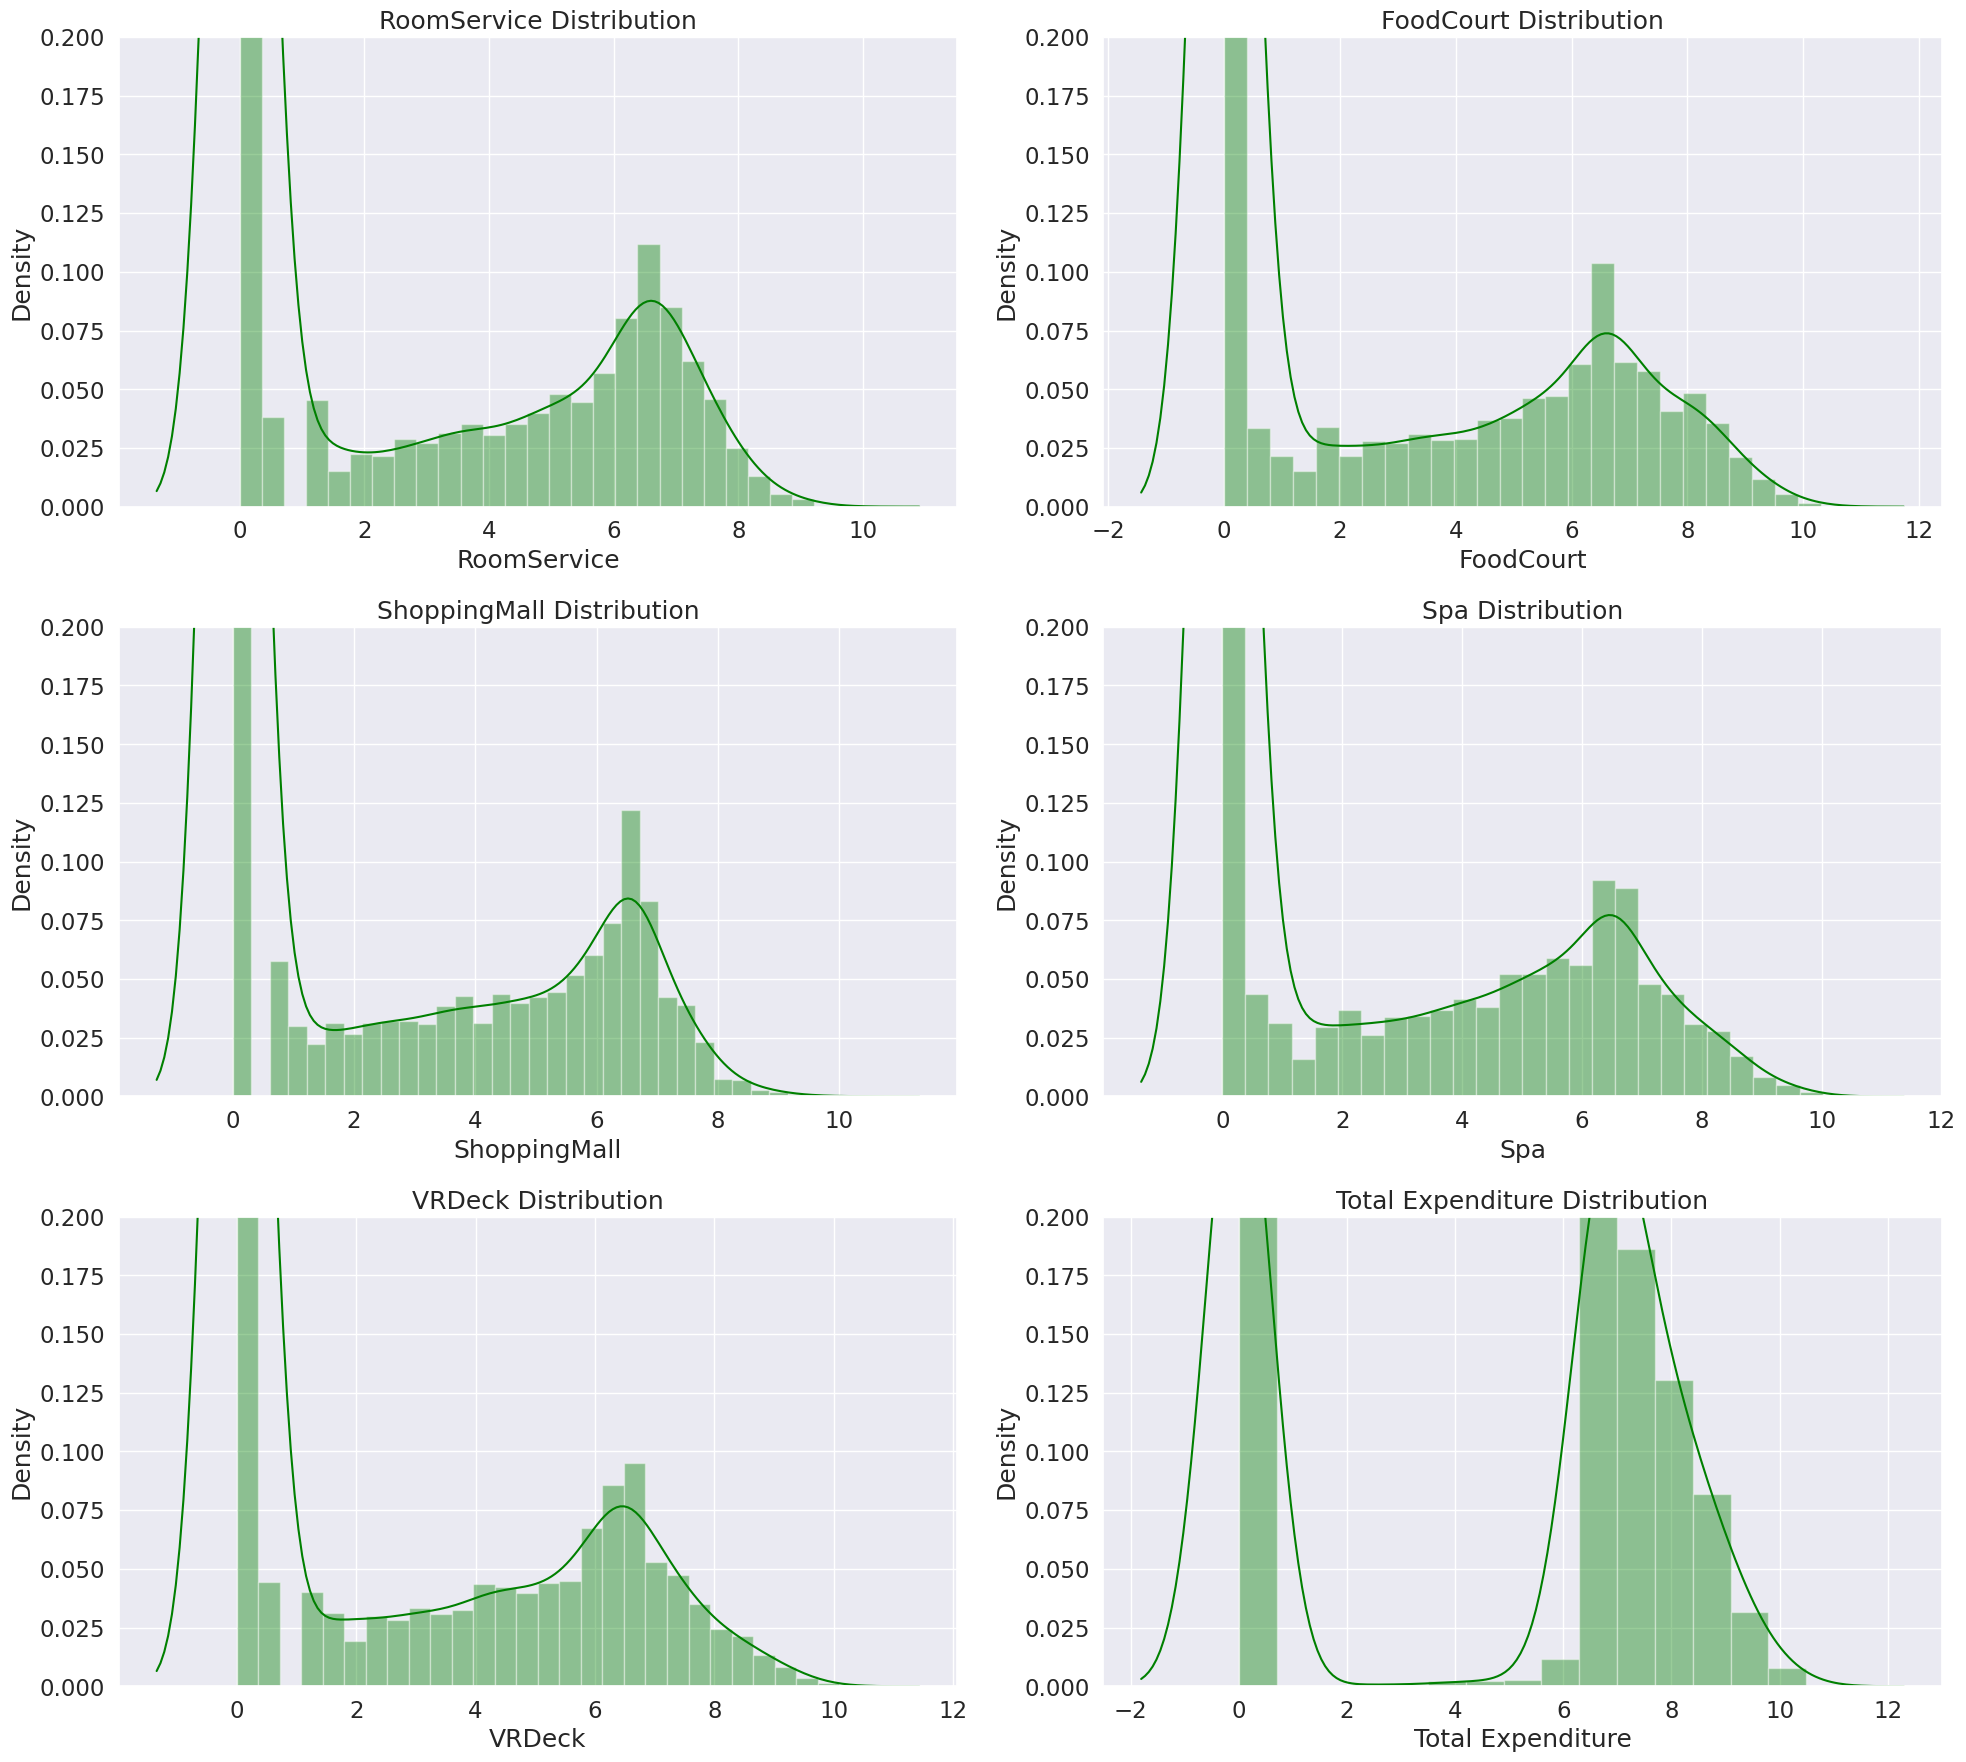

In [84]:
x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

In [85]:
# Checking the data types
train_df.dtypes

,0
HomePlanet,object
CryoSleep,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64
Spa,float64
VRDeck,float64


In [86]:
train_df['CryoSleep'].value_counts()

,count
CryoSleep,
False,5656
True,3037


In [87]:
train_df['VIP'].value_counts()

,count
VIP,
False,8494
True,199


In [88]:
train_df['Travelling_Solo'].value_counts()

,count
Travelling_Solo,
True,4805
False,3888


In [89]:
train_df['No Spending'].value_counts()

,count
No Spending,
False,5040
True,3653


In [90]:
cols=['CryoSleep','VIP','Travelling_Solo','No Spending','Cabin_region1','Cabin_region2','Cabin_region3','Cabin_region4','Cabin_region5','Cabin_region6']
train_df[cols]=train_df[cols].astype(bool)
test_df[cols]=test_df[cols].astype(bool)

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HomePlanet            8693 non-null   object 
 1   CryoSleep             8693 non-null   bool   
 2   Destination           8693 non-null   object 
 3   Age                   8693 non-null   float64
 4   VIP                   8693 non-null   bool   
 5   RoomService           8693 non-null   float64
 6   FoodCourt             8693 non-null   float64
 7   ShoppingMall          8693 non-null   float64
 8   Spa                   8693 non-null   float64
 9   VRDeck                8693 non-null   float64
 10  Transported           8693 non-null   object 
 11  Travelling_Solo       8693 non-null   bool   
 12  Group_Size            8693 non-null   float64
 13  Cabin_Deck            8693 non-null   object 
 14  Cabin_Side            8693 non-null   object 
 15  Cabin_region1        

In [92]:
# Feature Encoding
# We will do one hot Encoding For Nominal Categorical Data
# We will do Label Encoding for ordiinal categorical data

nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_region1","Cabin_region2",
                    "Cabin_region3","Cabin_region4","Cabin_region5","Cabin_region6","Age_Group","No Spending",
                    "Expenditure Category"]

In [93]:
# Label Encoding
enc = LabelEncoder()

In [94]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [95]:
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)

In [96]:
train_df.head(2)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Age_Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.00000,0.000000,0.000000,0.000000,0.000000,False,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,False,True,False,False,False,True
1,0,24.0,0,4.70048,2.302585,3.258097,6.309918,3.806662,True,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,True,False,False,False,False,True


In [97]:
# We will still have transported column as bool
train_df['Transported'].replace({False:0,True:1},inplace=True)

In [98]:
train_df.head(3)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Age_Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.00000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,False,True,False,False,False,True
1,0,24.0,0,4.70048,2.302585,3.258097,6.309918,3.806662,1,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,True,False,False,False,False,True
2,0,58.0,1,3.78419,8.182280,0.000000,8.812248,3.912023,0,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,False,True,False,False,False,True


Machine Learning

In [99]:
X=train_df.drop(columns=['Transported'])
y=train_df['Transported']

In [100]:
scaler=StandardScaler()

In [101]:
X_scaled=scaler.fit_transform(X)

In [102]:
# Spliting the data for models who do not need Scaled data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Spliting the data for models who do not need Scaled data
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [104]:
training_score = []
testing_score = []

Model building For scaled data

In [105]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    #training_score.append(a)
    #testing_score.append(b)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 77.85447224618925
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.40080506037953

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.762214983713355
Recall Score of LogisticRegression() model is: 0.8013698630136986
F1 Score of LogisticRegression() model is: 0.7813021702838063

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


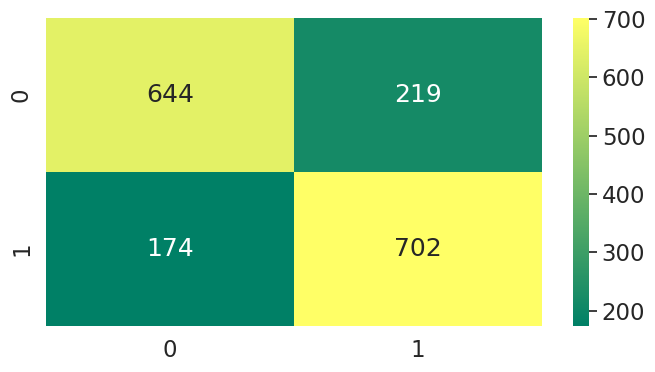

In [106]:
# Logistic Regression
model_prediction(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.18953120506184
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 74.81311098332375

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7613365155131265
Recall Score of KNeighborsClassifier() model is: 0.728310502283105
F1 Score of KNeighborsClassifier() model is: 0.7444574095682613

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


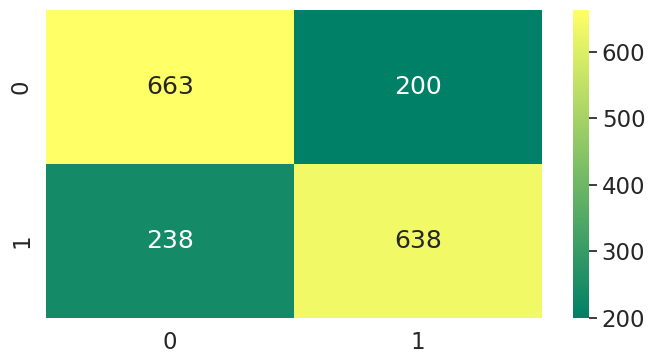

In [107]:
# KNN
model_prediction(KNeighborsClassifier())

Accuracy_Score of SVC() model on Training Data is: 81.8234109864826
Accuracy_Score of SVC() model on Testing Data is: 79.58596894767108

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7997698504027618
Recall Score of SVC() model is: 0.79337899543379
F1 Score of SVC() model is: 0.7965616045845272

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


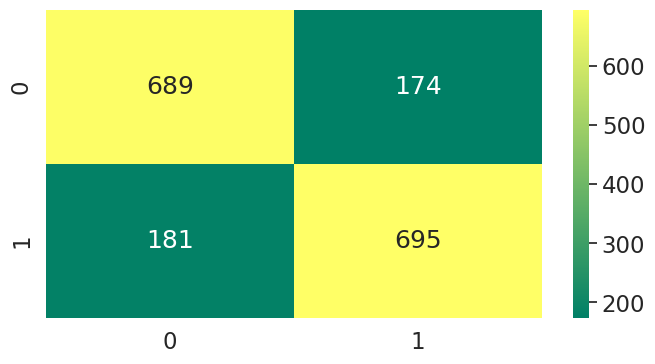

In [108]:
#SVC
model_prediction(SVC())

Accuracy_Score of GaussianNB() model on Training Data is: 73.89991371872304
Accuracy_Score of GaussianNB() model on Testing Data is: 73.26049453709028

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.7773279352226721
Recall Score of GaussianNB() model is: 0.6575342465753424
F1 Score of GaussianNB() model is: 0.712430426716141

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


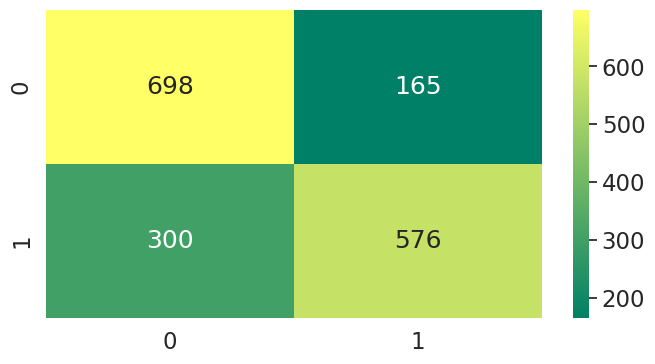

In [109]:
# Naive Bayes
model_prediction(GaussianNB())


Model building For Unscaled data

In [110]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    #training_score.append(a)
    #testing_score.append(b)

    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.46131722749497
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 74.18056354226566

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7407407407407407
Recall Score of DecisionTreeClassifier() model is: 0.7517084282460137
F1 Score of DecisionTreeClassifier() model is: 0.746184284906727

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


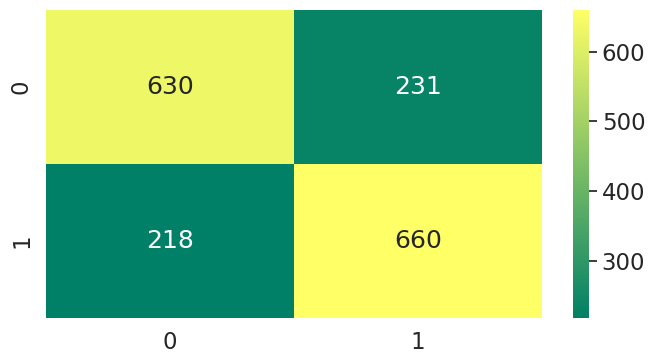

In [111]:
#Decision Tree
model_prediction(DecisionTreeClassifier())


Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.46131722749497
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 78.89591719378953

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8030842230130486
Recall Score of RandomForestClassifier() model is: 0.7710706150341685
F1 Score of RandomForestClassifier() model is: 0.7867518884369552

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


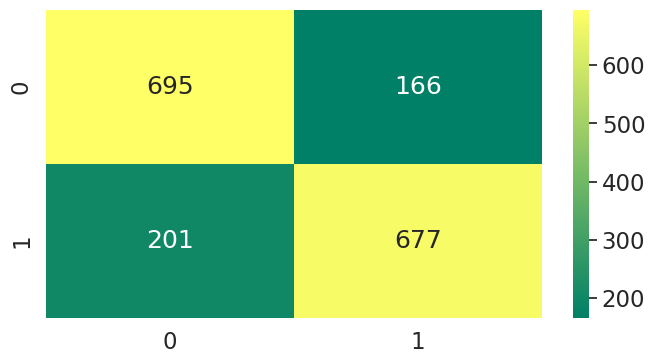

In [112]:
#Random Forest(Bagging)
model_prediction(RandomForestClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 82.32671843543284
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 79.18343875790684

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7704402515723271
Recall Score of GradientBoostingClassifier() model is: 0.837129840546697
F1 Score of GradientBoostingClassifier() model is: 0.8024017467248908

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


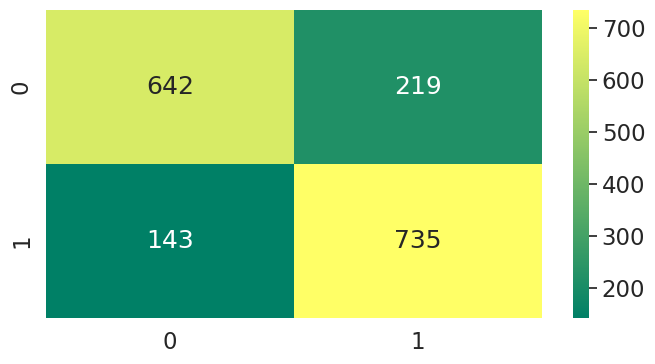

In [113]:
# Gradient Boosting
model_prediction(GradientBoostingClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 92.83865401207937
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, de

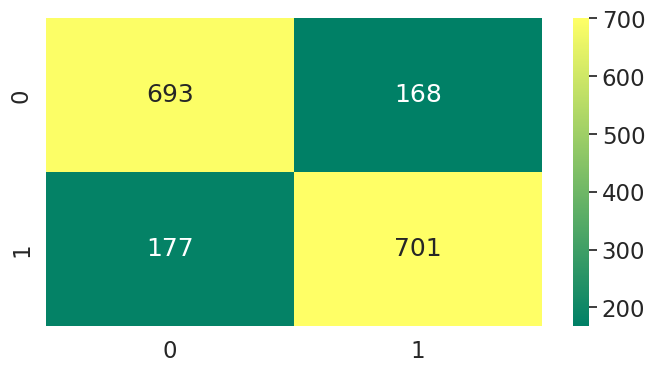

In [114]:
#XG Boost
model_prediction(XGBClassifier())

In [116]:
# HyperParameter On XG Boost
model3 = XGBClassifier()

In [117]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [118]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [ ]:
grid_search3.fit(x_train,y_train)

In [ ]:
grid_search3.best_score_

In [ ]:
best_parameters3 = grid_search3.best_params_
best_parameters3

In [ ]:
model3 = XGBClassifier(**best_parameters3)

In [ ]:
model3.fit(x_train,y_train)

In [ ]:
x_test_pred3 = model3.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred3)

In [121]:
# Hyperparameter On Random Forest
model4 = RandomForestClassifier()

In [122]:
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12],
               'min_samples_leaf':[4,5,6]}


In [123]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [ ]:
grid_search4.fit(x_train,y_train.values.ravel())

In [ ]:
grid_search4.best_score_

In [ ]:
best_parameters4 = grid_search4.best_params_
best_parameters4

In [ ]:
model4 = RandomForestClassifier(**best_parameters4)

In [ ]:
model4.fit(x_train,y_train)

In [ ]:
x_test_pred4 = model4.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred4)